# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.3MB/s eta 0:00:01
pyspark 2.2.1 requires py4j==0.10.4, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pd.__version__

u'0.20.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [5]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()
#print(movies[movies.title == "Harry Potter"])

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()
print(cast[["year","name"]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB
         year                            name
0        2015                        Buffy #1
1        1985                          Homo $
2        2017                         $hutter
3        2015                         $hutter
4        2015                         $hutter
5        2015                         $hutter
6        2015                         $hutter
7        2009                    Bee Moe $lim
8        2014       Jori ' Danilo' Jurado Jr.
9        2014                Syaiful 'Ariffin
10       2014              Taipaleti 'Atu'ake
11       2015      Michael 'babeepower' Viera
12       1998      Michael 'babeepower' Viera
13       2000               Steven 'Bear'Boyd
14       2016 

In [6]:
#cast.tail(200)
cast.groupby(["type"]).count()

,title,year,name,character,n
type,,,,,
actor,2532681,2532681,2532681,2532681,1539800
actress,1253495,1253495,1253495,1253495,787803


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

('Total Batman Movies:', 2)


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

('Total Batman Movies:', 35)


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
release_dates[release_dates.title.str.contains("Harry Potter")].sort_values(by=['date'],ascending=False)

,title,year,country,date
150239,Harry Potter and the Deathly Hallows: Part 2,2011,Zimbabwe,2012-03-01
150238,Harry Potter and the Deathly Hallows: Part 2,2011,Vietnam,2012-02-03
150237,Harry Potter and the Deathly Hallows: Part 2,2011,Cambodia,2011-08-25
150171,Harry Potter and the Deathly Hallows: Part 1,2010,Cambodia,2011-08-18
150236,Harry Potter and the Deathly Hallows: Part 2,2011,China,2011-08-04
150235,Harry Potter and the Deathly Hallows: Part 2,2011,Indonesia,2011-07-29
150234,Harry Potter and the Deathly Hallows: Part 2,2011,Pakistan,2011-07-22
150233,Harry Potter and the Deathly Hallows: Part 2,2011,Venezuela,2011-07-15
150232,Harry Potter and the Deathly Hallows: Part 2,2011,USA,2011-07-15
150231,Harry Potter and the Deathly Hallows: Part 2,2011,UK,2011-07-15


In [14]:
movies[movies.title.str.contains("Harry Potter")].sort_values(by=['year'],ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [15]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [16]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [17]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018) ])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [19]:
print(len(movies[movies.title.str.contains("Hamlet")]))
movies[movies.title.str.contains("Hamlet")]

57


,title,year
1931,Hamlet,2009
8214,Hamlet,1976
10364,Hamlet A.D.D.,2014
17531,Hamlet's Ghost,2015
17833,Zombie Hamlet,2012
40045,Hamlet (II),2005
44571,Hamlet (II),2015
46344,Hamlet,1921
47248,Hamlet liikemaailmassa,1987
50271,Hamlet/Horatio,2017


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [20]:
movies[movies.title.str.contains("Hamlet") & (movies.year >=2000)].sort_values(by =['year'],ascending=False)

,title,year
78217,Hamlet: The Fall of a Sparrow,2018
244747,Hamlet,2017
240089,Hamlet in the Golden Vale,2017
50271,Hamlet/Horatio,2017
98329,Hamlet (II),2017
70547,Royal Shakespeare Company: Hamlet,2016
191940,Hamlet,2016
186137,Hamlet,2015
133802,National Theatre Live: Hamlet,2015
209533,"Hamlet, Son of a Kingpin",2015


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [30]:
sup_cast=cast[(cast.title.str.contains("Inception")) & cast.n.isnull() == True]
len(sup_cast)
print(sup_cast)


                                                     title  year  \
58474    Fraud in the Inception: Who killed Robert Haml...  2013   
98153                                            Inception  2010   
197877                                           Inception  2010   
374661                                           Inception  2010   
497161                                           Inception  2010   
684098                                           Inception  2010   
690634                                           Inception  2010   
707642                                           Inception  2010   
836295                                           Inception  2010   
1006636                                          Inception  2010   
1095095                                          Inception  2010   
1108755                                          Inception  2010   
1120184                                          Inception  2010   
1189066                                         

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [32]:
main_cast_ineption = cast[(cast.title == "Inception") & (cast.n.isnull() == False)].sort_values(by =['n'],ascending=False)
main_cast_ineption

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


In [83]:
len(main_cast_ineption)

2327603

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [63]:
cast[cast.n.isnull() == False].sort_values(by =['n'],ascending=False).iloc[0:10,2:]

,name,type,character,n
2711830,Marium Carvell,actress,Selma Davis,33613.0
3419397,Brittany Alexis Phillips,actress,Erica,999.0
2894187,Catherine Fitzlanders,actress,Matty,999.0
2015838,Roque (III) Santos,actor,Candy Seller,999.0
708300,Leon Fazzio,actor,Henry,999.0
2696184,Lisa Calvillo,actress,Spaghetti Spectator,938.0
2497900,Srikanth Yellapragada,actor,Himself,911.0
1573585,Frank Montella,actor,Pyotr Yeftushenko,910.0
580657,Gurunadh Desu,actor,Guru,811.0
3094387,Hsiang Kao,actress,Shang San Ku,788.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [31]:
Albus_Dumbledore_df = cast[cast.character == "Albus Dumbledore"].iloc[:,2:]
print(Albus_Dumbledore_df)


                        name   type         character     n
704984          Dane Farwell  actor  Albus Dumbledore  17.0
792421        Michael Gambon  actor  Albus Dumbledore  37.0
792423        Michael Gambon  actor  Albus Dumbledore  36.0
792424        Michael Gambon  actor  Albus Dumbledore  27.0
947789        Richard Harris  actor  Albus Dumbledore  32.0
947790        Richard Harris  actor  Albus Dumbledore   1.0
1685537  George (X) O'Connor  actor  Albus Dumbledore   NaN
2248085    Timothy Tedmanson  actor  Albus Dumbledore   NaN


In [30]:
Albus_Dumbledore_df["name"].unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Timothy Tedmanson'], dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [37]:
#cast[cast.name == "Keanu Reeves"].groupby(["name","character"]).count()
#A)
len(cast[cast.name == "Keanu Reeves"]["character"].unique())
#B)


56

In [42]:
Keanu_Reeves_cast = cast[(cast.name == "Keanu Reeves") & (cast.n.isnull() == False) & (cast.year >= 1999)]
Keanu_Reeves_cast

,title,year,name,type,character,n
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892343,A Scanner Darkly,2006,Keanu Reeves,actor,Bob Arctor,4.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892351,Ellie Parker,2005,Keanu Reeves,actor,Dogstar,21.0
1892353,Exposed (III),2016,Keanu Reeves,actor,Detective Galban,8.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0
1892362,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0
1892365,Keanu,2016,Keanu Reeves,actor,Keanu,25.0


In [40]:
Keanu_Reeves_cast.sort_values(by=["year"])


,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


In [88]:
len(name_Keanu_main_cast)

32

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [64]:
cast[((cast.type == "actor") | (cast.type == "actress")) & (cast.year >= 1950) & (cast.year <= 1960)].sort_values(by="year")[["year","type","character"]]

,year,type,character
3786094,1950,actress,Maria
3196093,1950,actress,Showgirl
960296,1950,actor,Bauernbursche
960306,1950,actor,Boy
960509,1950,actor,Wastl
960575,1950,actor,Waiter
960578,1950,actor,Fratzell
960595,1950,actor,Pawnbroker
960763,1950,actor,Mr. Denker
960773,1950,actor,Al Stern


In [65]:
cast[((cast.type == "actor") | (cast.type == "actress")) & (cast.year >= 2007) & (cast.year <= 2017)].sort_values(by="year")[["year","type","character"]]

,year,type,character
3267135,2007,actress,Mary
784234,2007,actor,Embassy Official
2845336,2007,actress,Josephine Hayden
325282,2007,actor,Pierrot
325278,2007,actor,Additional appearance
1177966,2007,actor,Officer Mahoney
3517968,2007,actress,Bride
2845322,2007,actress,Jacqueline de Rossy
1622850,2007,actor,Easy
784249,2007,actor,Bag seller


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [57]:
"support cast" in cast.type
    

False

In [59]:
import datetime
import numpy as np
now = datetime.datetime.now()
leading=cast[(cast.n == 1) & (cast.year >=2000) & (cast.year <= now.year)].sort_values(by=["title","year"],ascending = False)
leading
#leading_cast = leading.groupby(["title"])
#leading_cast.agg({"n":np.max})
#print(leading_cast)

,title,year,name,type,character,n
516945,xXx: State of the Union,2005,Willem Dafoe,actor,General George Deckert,1.0
592842,xXx: Return of Xander Cage,2017,Vin Diesel,actor,Xander Cage,1.0
592841,xXx,2002,Vin Diesel,actor,Xander Cage,1.0
3389285,www.XXX.com,2003,Juliana Palermo,actress,Joanna,1.0
2118208,w Delta z,2007,Stellan Skarsg?rd,actor,Eddie Argo,1.0
212966,uwantme2killhim?,2013,Jamie Blackley,actor,Mark,1.0
3279313,uk18,2017,Shona McWilliams,actress,Eloise,1.0
1667234,uMalusi,2008,Sivu Nobongoza,actor,Malusi,1.0
2899907,sxtape,2013,Caitlyn Folley,actress,Jill,1.0
1305151,re: solve,2014,Chris Chih-Cheng Lee,actor,Chen Shaoqiang,1.0


In [61]:
extra = cast[(cast.n.isnull() == True) & (cast.type != "support cast") & (cast.year >=2000) & (cast.year <= now.year)].sort_values(by="year")
extra

,title,year,name,type,character,n
568579,Anna Wunder,2000,Stephan Dellgr?n,actor,Rolli,NaN
223156,Cecil B. DeMented,2000,Michael Blumenstock,actor,Grip,NaN
1220507,The Little Vampire,2000,Koagoatboy,actor,Max,NaN
2961018,Srce nije u modi,2000,Ivana Grahovac,actress,Americka novinarka,NaN
708830,Fughe da fermo,2000,Luciano Federico,actor,Marty,NaN
1622417,Dos hermanos,2000,Diego Mu?oz,actor,Agust?n,NaN
1220487,Life,2000,Wing Chai Ko,actor,Taxi driver,NaN
1994475,A Better Way to Die,2000,Tony Sagastizado I,actor,Henchman,NaN
223124,Prymas. Trzy lata z tysiaca,2000,Andrzej Blumenfeld,actor,Herbert,NaN
415041,Just One Night,2000,Wallace Choy,actor,Waiter,NaN


In [62]:
non_leading = cast[(cast.n >=1) & (cast.type != "support cast") & (cast.year >=2000) & (cast.year <= now.year)].sort_values(by="year")
non_leading

,title,year,name,type,character,n
2089033,Artist i master izobrazheniya,2000,Vsevolod Shilovskiy,actor,Boss,4.0
1509980,Thomas and the Magic Railroad,2000,Russell Means,actor,Billy Twofeathers,3.0
2115647,It Had to Be You,2000,Tony Sirico,actor,Ricky Valentino,10.0
3209427,Peixe-Lua,2000,Rita Loureiro,actress,Leninha,13.0
1848374,Woman on Top,2000,B. Chico Purdiman,actor,Guard #1,40.0
106302,Rats,2000,Tony Azzopardi,actor,Inmate,27.0
1109509,Mission to Mars,2000,Jukka Joensuu,actor,Priest,32.0
2115551,Por la libre,2000,Otto (II) Sirgo,actor,Rodrigo Sr.,4.0
420776,Le monde de Marty,2000,Bernard Ch?ron,actor,Paul,13.0
1109521,Te jing xin ren lei 2,2000,Joey,actor,Guard,19.0


In [103]:
cast[(cast.title == "#Lucky Number")]

,title,year,name,type,character,n
228080,#Lucky Number,2015,Robert T. Bogue,actor,Vance Avery,10.0
391120,#Lucky Number,2015,Grizz Chapman,actor,Bouncer at Decadence,25.0
448651,#Lucky Number,2015,James Collins Jr.,actor,Roti,21.0
514599,#Lucky Number,2015,Joseph (II) D'Onofrio,actor,Blue Collar Mafia,14.0
570633,#Lucky Number,2015,William DeMeo,actor,Blue Collar Mafia,19.0
574903,#Lucky Number,2015,Ron Denson,actor,Football Player,NaN
577551,#Lucky Number,2015,Stephen DeRosa,actor,Ma?tre D',22.0
683476,#Lucky Number,2015,Eric W. Espinosa,actor,Referee,NaN
690982,#Lucky Number,2015,Bobby (II) Evers,actor,Wall Street D-Bag,32.0
704696,#Lucky Number,2015,Robert Farrior,actor,Gus Jacobson,13.0


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [15]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Honeymoon               11
The Three Musketeers    11
Freedom                 11
Othello                 11
Name: title, dtype: int64

In [87]:
cast.type.value_counts()

actor      2532681
actress    1253495
Name: type, dtype: int64

### Plot the top ten common movie names of all time

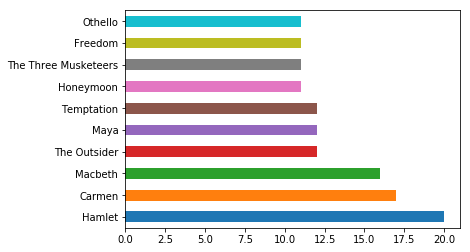

In [16]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [64]:
movies[(movies.year >= 2000) & (movies.year <= 2010)].groupby("year").count()

,title
year,
2000,2779
2001,2896
2002,3019
2003,3177
2004,3512
2005,4030
2006,4296
2007,4467
2008,5151


In [26]:
movies[(movies.year >= 2000) & (movies.year <= 2010)].groupby("year").count().sort_values(by=["title"],ascending= False)[0:3]

,title
year,
2010,6415
2009,6125
2008,5151


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [11]:
movies[movies.year//10*10 == 2000].groupby("year").count().sum()

title    39452
dtype: int64

In [6]:
movies["year"].value_counts()

2017    11474
2016     9440
2015     8702
2014     8264
2018     8041
2013     7896
2012     7398
2011     6988
2010     6415
2009     6125
2008     5151
2007     4467
2006     4296
2005     4030
2004     3512
2003     3177
2002     3019
2001     2896
2000     2779
1999     2579
1998     2459
1997     2396
1988     2390
1990     2364
1991     2318
1989     2307
1987     2306
1992     2230
1970     2225
1969     2217
        ...  
1924      811
1946      806
1929      790
1943      780
1923      756
1944      733
1945      656
1914      573
1913      250
2020      220
1912      113
1911       53
2021       34
1910       23
2022       18
1909       16
2024        6
1908        6
1900        5
2023        5
1906        5
1907        4
1905        2
1903        1
1899        1
2026        1
1894        1
1898        1
2025        1
2115        1
Name: year, Length: 128, dtype: int64

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [67]:
cast.groupby("character").count().sort_values(by="title",ascending = False)[0:9]

,title,year,name,type,n
character,,,,,
Himself,20746,20746,20746,20746,7806
Dancer,12477,12477,12477,12477,5635
Extra,11948,11948,11948,11948,4299
Reporter,8434,8434,8434,8434,2722
Student,7773,7773,7773,7773,2309
Doctor,7669,7669,7669,7669,3991
Party Guest,7245,7245,7245,7245,1909
Policeman,7029,7029,7029,7029,3254
Nurse,6999,6999,6999,6999,3327


In [74]:
cast[cast.character == "Herself"].groupby("name").count().sort_values(by="character",ascending = False)[0:9]

,title,year,type,character,n
name,,,,,
Queen Elizabeth II,12,12,12,12,0
Joyce Brothers,9,9,9,9,9
Luisa Horga,9,9,9,9,9
Mar?a Luisa (V) Mart?n,9,9,9,9,9
Hillary Clinton,8,8,8,8,0
Margaret Thatcher,8,8,8,8,0
In?s J. Southern,6,6,6,6,6
Marta Berrocal,6,6,6,6,5
Oprah Winfrey,6,6,6,6,2


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [84]:
cast[cast.character.str.startswith("Zombie") == True].groupby("character").count().sort_values(by="title",ascending = False)[0:9]

,title,year,name,type,n
character,,,,,
Zombie,6264,6264,6264,6264,2068
Zombie Horde,206,206,206,206,9
Zombie - Protestor - Victim,78,78,78,78,9
Zombie Extra,70,70,70,70,4
Zombie Dancer,43,43,43,43,13
Zombie Girl,36,36,36,36,11
Zombie #1,36,36,36,36,19
Zombie #2,31,31,31,31,12
Zombie Vampire,25,25,25,25,0


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [188]:
Keanu_year = cast[cast.name=="Keanu Reeves"].groupby("year").count()
Keanu_year

,title,name,type,character,n
year,,,,,
1985,1,1,1,1,1
1986,3,3,3,3,3
1988,4,4,4,4,4
1989,2,2,2,2,2
1990,2,2,2,2,2
1991,3,3,3,3,3
1992,1,1,1,1,1
1993,4,4,4,4,3
1994,1,1,1,1,1


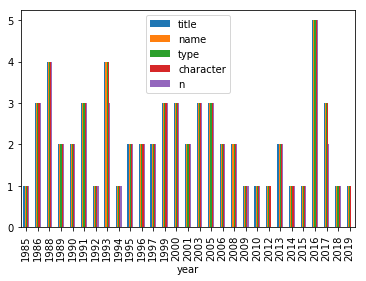

In [189]:
Keanu_year.plot(kind="bar")

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [192]:
Keanu_year = cast[cast.name=="Keanu Reeves"].groupby("year")
graph = Keanu_year.n.value_counts()
graph

year  n   
1985  1.0     1
1986  2.0     1
      3.0     1
      12.0    1
1988  1.0     1
      2.0     1
      5.0     1
      6.0     1
1989  1.0     1
      8.0     1
1990  2.0     1
      6.0     1
1991  2.0     2
      1.0     1
1992  4.0     1
1993  1.0     1
      5.0     1
      13.0    1
1994  1.0     1
1995  1.0     2
1996  1.0     2
1997  1.0     1
      2.0     1
1999  42.0    2
      1.0     1
2000  3.0     2
      1.0     1
2001  1.0     2
2003  3.0     1
      33.0    1
      59.0    1
2005  1.0     1
      17.0    1
      21.0    1
2006  1.0     1
      4.0     1
2008  1.0     2
2009  16.0    1
2010  1.0     1
2013  1.0     1
      2.0     1
2014  1.0     1
2015  1.0     1
2016  8.0     2
      1.0     1
      4.0     1
      25.0    1
2017  1.0     1
      11.0    1
2018  1.0     1
Name: n, dtype: int64

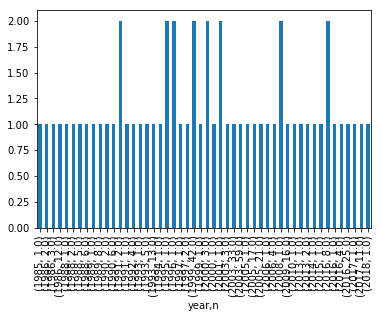

In [194]:
graph.plot(kind="bar")

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

In [195]:
cast.columns

Index([u'title', u'year', u'name', u'type', u'character', u'n'], dtype='object')

In [196]:
release_dates.columns

Index([u'title', u'year', u'country', u'date'], dtype='object')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [97]:
cast[(cast.year >=1960) & (cast.year <=1969) & (cast.n == 1)].groupby("type").count()["n"]

type
actor      8320
actress    3503
Name: n, dtype: int64

In [98]:
cast[(cast.year >=2000) & (cast.year <=2009) & (cast.n == 1)].groupby("type").count()["n"]

type
actor      18557
actress     7787
Name: n, dtype: int64

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [119]:
cast[cast.name == "Frank Oz"].sort_values(by="year").groupby("title").count()

,year,name,type,character,n
title,,,,,
An American Werewolf in London,2,2,2,2,2
Blues Brothers 2000,1,1,1,1,1
Follow That Bird,3,3,3,3,3
Innocent Blood,1,1,1,1,1
Inside Out,1,1,1,1,1
Labyrinth,1,1,1,1,1
"Monsters, Inc.",1,1,1,1,1
Muppet Treasure Island,4,4,4,4,4
Muppets from Space,4,4,4,4,4


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [121]:
frank_oz_character = cast[cast.name == "Frank Oz"].groupby("character").count()
frank_oz_character

,title,year,name,type,n
character,,,,,
Animal,6,6,6,6,6
"Aughra, a Keeper Of Secrets (performer)",1,1,1,1,1
Bert,3,3,3,3,3
Brain Surgeon,1,1,1,1,0
Chamberlain (performer),1,1,1,1,1
Cookie Monster,5,5,5,5,4
Corrections Officer,1,1,1,1,1
Corrupt Cop,1,1,1,1,1
Doc Hopper's Men,1,1,1,1,1


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

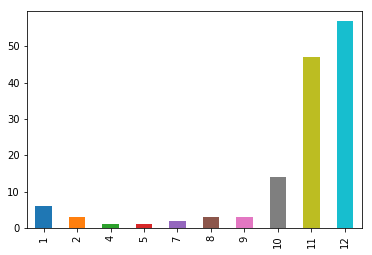

In [17]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

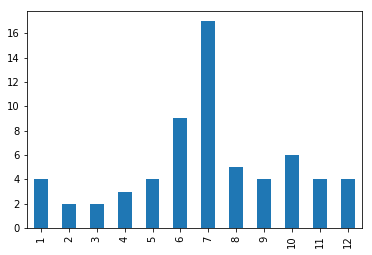

In [128]:
SummerTitle_release = release_dates[release_dates.title.str.contains("Summer") & (release_dates.country == "USA")]
monthly_freq = SummerTitle_release.date.dt.month.value_counts().sort_index()
monthly_freq.plot(kind="bar")

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

In [131]:
ActionTitle_movie = release_dates[(release_dates.title.str.contains("Action")) & (release_dates.country == "USA")]
ActionTitle_movie

,title,year,country,date
6813,A Civil Action,1998,USA,1999-01-08
9032,A Man of Action,1923,USA,1923-06-03
14034,Ace of Action,1926,USA,1926-11-28
14318,Action,1921,USA,1921-09-12
14325,Action Galore,1925,USA,1925-11-03
14331,Action Jackson,1988,USA,1988-02-12
14354,Action Point,2018,USA,2018-03-23
14359,Action Short,2013,USA,2013-04-29
14362,Action for Slander,1937,USA,1938-01-14
14370,Action in the North Atlantic,1943,USA,1943-06-12


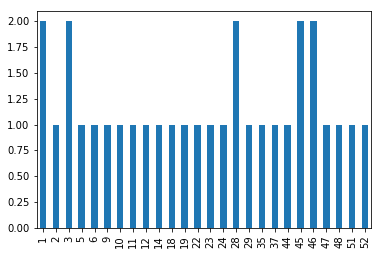

In [137]:
freq_Aciontitle = ActionTitle_movie.date.dt.week.value_counts().sort_index()
freq_Aciontitle.plot(kind="bar")

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [146]:
#set_index will set index of 1st table cast to 2nd table release_date bcoz both may be having data on different index
Keanu_cast_release= cast.join(release_dates.set_index(["title","year"]),on=["title","year"],how="inner")
Keanu_cast_release

,title,year,name,type,character,n,country,date
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,Taiwan,2016-05-27
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,Germany,2016-10-06
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,France,2017-12-13
5961,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,Taiwan,2016-05-27
5961,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,Germany,2016-10-06
5961,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,France,2017-12-13
419580,Closet Monster,2015,Chunk (III),actor,Buffy 1,28.0,Taiwan,2016-05-27
419580,Closet Monster,2015,Chunk (III),actor,Buffy 1,28.0,Germany,2016-10-06
419580,Closet Monster,2015,Chunk (III),actor,Buffy 1,28.0,France,2017-12-13
744113,Closet Monster,2015,Teigan Follett,actor,Greg,20.0,Taiwan,2016-05-27


In [167]:
Keanu_cast_release_Usa_main = Keanu_cast_release[(Keanu_cast_release.name == "Keanu Reeves") & 
                   (Keanu_cast_release.n == 1.0) & (Keanu_cast_release.country == "USA") ].sort_values(by="date")
Keanu_cast_release_Usa_main

,title,year,name,type,character,n,country,date
1892394,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
1892346,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
1892345,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
1892367,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
1892380,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
1892364,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
1892344,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
1892347,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
1892354,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
1892386,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


In [168]:
cast.columns
release_dates.columns

Index([u'title', u'year', u'country', u'date'], dtype='object')

In [169]:
 len(Keanu_cast_release_Usa_main)

22

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

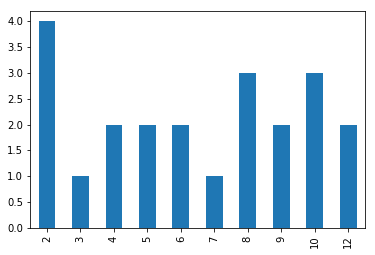

In [173]:
graph = Keanu_cast_release_Usa_main.date.dt.month.value_counts().sort_index()
graph.plot(kind="bar")

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [174]:
cast_release_join= cast.join(release_dates.set_index(["title","year"]),on=["title","year"],how="inner")

Ian_USA = cast_release_join[(cast_release_join.name == "Ian McKellen") & (cast_release_join.country =="USA")]
Ian_USA

,title,year,name,type,character,n,country,date
1498681,The Golden Compass,2007,Ian McKellen,actor,Iorek Byrnison,6.0,USA,2007-12-07
1498692,The Wolverine,2013,Ian McKellen,actor,Magneto,NaN,USA,2013-07-26
1498662,Gods and Monsters,1998,Ian McKellen,actor,James Whale,1.0,USA,1998-11-04
1498665,Last Action Hero,1993,Ian McKellen,actor,Death,11.0,USA,1993-06-18
1498675,Six Degrees of Separation,1993,Ian McKellen,actor,Geoffrey,4.0,USA,1993-12-08
1498686,The Lord of the Rings: The Fellowship of the Ring,2001,Ian McKellen,actor,Gandalf,17.0,USA,2001-12-19
1498687,The Lord of the Rings: The Return of the King,2003,Ian McKellen,actor,Gandalf,20.0,USA,2003-12-17
1498677,Swept from the Sea,1997,Ian McKellen,actor,Dr. James Kennedy,3.0,USA,1998-01-23
1498698,X-Men: The Last Stand,2006,Ian McKellen,actor,Erik Lehnsherr,3.0,USA,2006-05-26
1498699,X-Men: The Last Stand,2006,Ian McKellen,actor,Magneto,3.0,USA,2006-05-26


In [178]:
Ian_year_graph = Ian_USA.date.dt.year.value_counts().sort_index()
Ian_year_graph


1981    1
1983    1
1985    1
1989    1
1993    3
1994    3
1995    1
1996    2
1997    1
1998    3
2000    2
2001    1
2002    1
2003    3
2006    5
2007    2
2012    1
2013    2
2014    2
2015    1
2017    1
2018    1
Name: date, dtype: int64

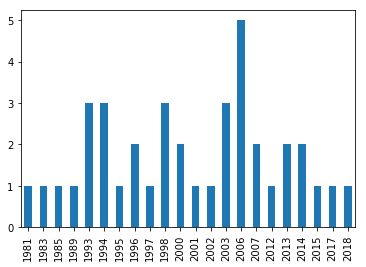

In [179]:
Ian_year_graph.plot(kind="bar")